In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [7]:
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train,test], ignore_index=True)

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [11]:
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [12]:
pd.set_option("display.max_rows", None)

In [13]:
df.isnull().any()

id               False
mssubclass       False
mszoning          True
lotfrontage       True
lotarea          False
street           False
alley             True
lotshape         False
landcontour      False
utilities         True
lotconfig        False
landslope        False
neighborhood     False
condition1       False
condition2       False
bldgtype         False
housestyle       False
overallqual      False
overallcond      False
yearbuilt        False
yearremodadd     False
roofstyle        False
roofmatl         False
exterior1st       True
exterior2nd       True
masvnrtype        True
masvnrarea        True
exterqual        False
extercond        False
foundation       False
bsmtqual          True
bsmtcond          True
bsmtexposure      True
bsmtfintype1      True
bsmtfinsf1        True
bsmtfintype2      True
bsmtfinsf2        True
bsmtunfsf         True
totalbsmtsf       True
heating          False
heatingqc        False
centralair       False
electrical        True
1stflrsf   

In [14]:
df.isnull().sum()

id                  0
mssubclass          0
mszoning            4
lotfrontage       486
lotarea             0
street              0
alley            2721
lotshape            0
landcontour         0
utilities           2
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         1
exterior2nd         1
masvnrtype         24
masvnrarea         23
exterqual           0
extercond           0
foundation          0
bsmtqual           81
bsmtcond           82
bsmtexposure       82
bsmtfintype1       79
bsmtfinsf1          1
bsmtfintype2       80
bsmtfinsf2          1
bsmtunfsf           1
totalbsmtsf         1
heating             0
heatingqc           0
centralair          0
electrical          1
1stflrsf            0
2ndflrsf            0
lowqualfin

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2919 non-null   int64  
 1   mssubclass     2919 non-null   int64  
 2   mszoning       2915 non-null   object 
 3   lotfrontage    2433 non-null   float64
 4   lotarea        2919 non-null   int64  
 5   street         2919 non-null   object 
 6   alley          198 non-null    object 
 7   lotshape       2919 non-null   object 
 8   landcontour    2919 non-null   object 
 9   utilities      2917 non-null   object 
 10  lotconfig      2919 non-null   object 
 11  landslope      2919 non-null   object 
 12  neighborhood   2919 non-null   object 
 13  condition1     2919 non-null   object 
 14  condition2     2919 non-null   object 
 15  bldgtype       2919 non-null   object 
 16  housestyle     2919 non-null   object 
 17  overallqual    2919 non-null   int64  
 18  overallc

In [16]:
df['lotfrontage'] = df['lotfrontage'].fillna(df['lotfrontage'].mean())
df['bsmtcond']= df['bsmtcond'].fillna(df['bsmtcond'].mode()[0])
df['bsmtqual']= df['bsmtqual'].fillna(df['bsmtqual'].mode()[0])
df['fireplacequ']= df['fireplacequ'].fillna(df['fireplacequ'].mode()[0])
df['garagetype']= df['garagetype'].fillna(df['garagetype'].mode()[0])
df['garagefinish']= df['garagefinish'].fillna(df['garagefinish'].mode()[0])
df['garagequal']= df['garagequal'].fillna(df['garagequal'].mode()[0])
df['garagecond']= df['garagecond'].fillna(df['garagecond'].mode()[0])
df['mszoning']= df['mszoning'].fillna(df['mszoning'].mode()[0])

In [17]:
df.isnull().sum()

id                  0
mssubclass          0
mszoning            0
lotfrontage         0
lotarea             0
street              0
alley            2721
lotshape            0
landcontour         0
utilities           2
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         1
exterior2nd         1
masvnrtype         24
masvnrarea         23
exterqual           0
extercond           0
foundation          0
bsmtqual            0
bsmtcond            0
bsmtexposure       82
bsmtfintype1       79
bsmtfinsf1          1
bsmtfintype2       80
bsmtfinsf2          1
bsmtunfsf           1
totalbsmtsf         1
heating             0
heatingqc           0
centralair          0
electrical          1
1stflrsf            0
2ndflrsf            0
lowqualfin

In [18]:
pd.set_option("display.max_columns", None)

In [19]:
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [20]:
df.value_counts()

Series([], dtype: int64)

In [21]:
df['mszoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: mszoning, dtype: int64

In [22]:
df['mszoning']= df['mszoning'].fillna(df['mszoning'].mode()[0])


In [23]:
df.isnull().sum()

id                  0
mssubclass          0
mszoning            0
lotfrontage         0
lotarea             0
street              0
alley            2721
lotshape            0
landcontour         0
utilities           2
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         1
exterior2nd         1
masvnrtype         24
masvnrarea         23
exterqual           0
extercond           0
foundation          0
bsmtqual            0
bsmtcond            0
bsmtexposure       82
bsmtfintype1       79
bsmtfinsf1          1
bsmtfintype2       80
bsmtfinsf2          1
bsmtunfsf           1
totalbsmtsf         1
heating             0
heatingqc           0
centralair          0
electrical          1
1stflrsf            0
2ndflrsf            0
lowqualfin

In [24]:
df.exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: exterior1st, dtype: int64

In [25]:
df.exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: exterior2nd, dtype: int64

In [26]:
df['exterior1st']= df['exterior1st'].fillna(df['exterior1st'].mode()[0])
df['exterior2nd']= df['exterior2nd'].fillna(df['exterior2nd'].mode()[0])

In [27]:
df.drop(['garageyrblt','poolqc','fence','miscfeature'], axis=1, inplace=True)

In [28]:
df.shape

(2919, 78)

In [29]:
df.isnull().sum()

id                  0
mssubclass          0
mszoning            0
lotfrontage         0
lotarea             0
street              0
alley            2721
lotshape            0
landcontour         0
utilities           2
lotconfig           0
landslope           0
neighborhood        0
condition1          0
condition2          0
bldgtype            0
housestyle          0
overallqual         0
overallcond         0
yearbuilt           0
yearremodadd        0
roofstyle           0
roofmatl            0
exterior1st         0
exterior2nd         0
masvnrtype         24
masvnrarea         23
exterqual           0
extercond           0
foundation          0
bsmtqual            0
bsmtcond            0
bsmtexposure       82
bsmtfintype1       79
bsmtfinsf1          1
bsmtfintype2       80
bsmtfinsf2          1
bsmtunfsf           1
totalbsmtsf         1
heating             0
heatingqc           0
centralair          0
electrical          1
1stflrsf            0
2ndflrsf            0
lowqualfin

In [30]:
df['saleprice']= df['saleprice'].fillna(df['saleprice'].mean())
df['masvnrarea']= df['masvnrarea'].fillna(df['masvnrarea'].mode()[0])
df['masvnrtype']= df['masvnrtype'].fillna(df['masvnrtype'].mode()[0])

In [31]:
df['bsmtexposure']= df['bsmtexposure'].fillna(df['bsmtexposure'].mode()[0])
df['bsmtfintype1']= df['bsmtfintype1'].fillna(df['bsmtfintype1'].mode()[0])
df['bsmtfintype2']= df['bsmtfintype2'].fillna(df['bsmtfintype2'].mode()[0])

In [32]:
df.drop(['alley'], axis=1, inplace=True)

In [33]:
df.shape

(2919, 77)

In [34]:
df.isnull().sum()

id               0
mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
street           0
lotshape         0
landcontour      0
utilities        2
lotconfig        0
landslope        0
neighborhood     0
condition1       0
condition2       0
bldgtype         0
housestyle       0
overallqual      0
overallcond      0
yearbuilt        0
yearremodadd     0
roofstyle        0
roofmatl         0
exterior1st      0
exterior2nd      0
masvnrtype       0
masvnrarea       0
exterqual        0
extercond        0
foundation       0
bsmtqual         0
bsmtcond         0
bsmtexposure     0
bsmtfintype1     0
bsmtfinsf1       1
bsmtfintype2     0
bsmtfinsf2       1
bsmtunfsf        1
totalbsmtsf      1
heating          0
heatingqc        0
centralair       0
electrical       1
1stflrsf         0
2ndflrsf         0
lowqualfinsf     0
grlivarea        0
bsmtfullbath     2
bsmthalfbath     2
fullbath         0
halfbath         0
bedroomabvgr     0
kitchenabvgr     0
kitchenqual 

In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(2909, 77)

In [37]:
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive',
       'wooddecksf', 'openpo

In [38]:
df['bsmtfinsf1']= df['bsmtfinsf1'].fillna(df['bsmtfinsf1'].mean())
df['bsmtfinsf2']= df['bsmtfinsf2'].fillna(df['bsmtfinsf2'].mean())
df['bsmtunfsf']= df['bsmtunfsf'].fillna(df['bsmtunfsf'].mean())
df['totalbsmtsf']= df['totalbsmtsf'].fillna(df['totalbsmtsf'].mean())
df['garagearea']= df['garagearea'].fillna(df['garagearea'].mean())
df['garagecars']= df['garagecars'].fillna(df['garagecars'].mean())

In [39]:
df.isnull().sum()

id               0
mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
street           0
lotshape         0
landcontour      0
utilities        0
lotconfig        0
landslope        0
neighborhood     0
condition1       0
condition2       0
bldgtype         0
housestyle       0
overallqual      0
overallcond      0
yearbuilt        0
yearremodadd     0
roofstyle        0
roofmatl         0
exterior1st      0
exterior2nd      0
masvnrtype       0
masvnrarea       0
exterqual        0
extercond        0
foundation       0
bsmtqual         0
bsmtcond         0
bsmtexposure     0
bsmtfintype1     0
bsmtfinsf1       0
bsmtfintype2     0
bsmtfinsf2       0
bsmtunfsf        0
totalbsmtsf      0
heating          0
heatingqc        0
centralair       0
electrical       0
1stflrsf         0
2ndflrsf         0
lowqualfinsf     0
grlivarea        0
bsmtfullbath     0
bsmthalfbath     0
fullbath         0
halfbath         0
bedroomabvgr     0
kitchenabvgr     0
kitchenqual 

In [40]:
df.shape

(2909, 77)

In [41]:
df.drop(['source'], axis=1, inplace=True)

In [42]:
df.shape

(2909, 76)

In [43]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [44]:
df.garagefinish.value_counts()

Unf    1380
RFn     811
Fin     718
Name: garagefinish, dtype: int64

<AxesSubplot:>

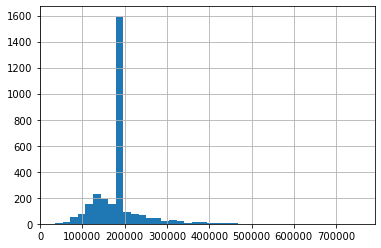

In [45]:
df['saleprice'].hist(bins=40)

<AxesSubplot:>

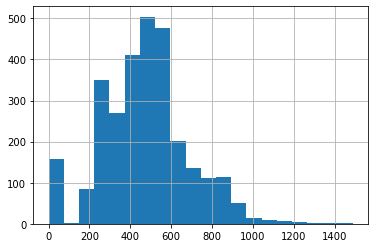

In [46]:
df.garagearea.hist(bins=20)

In [47]:
numerical_cols = [cname for cname in df if 
                 df[cname].dtypes in ['int64', 'float64']]
df = df[numerical_cols]
df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=20)

In [50]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [51]:
df_full_train.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
463,464,70,74.000000,11988,6,7,1934,1995,0.0,326.0,0.0,389.0,715.0,849,811,0,1660,0.0,0.0,1,1,3,1,6,1,1.0,240.0,0,0,0,0,0,0,0,8,2008,188700.00000
2742,2743,80,125.000000,10000,5,6,1956,1956,272.0,678.0,281.0,99.0,1058.0,1370,0,0,1370,1.0,0.0,1,0,3,1,6,1,1.0,300.0,191,0,0,0,120,0,0,2,2006,180921.19589
2268,2269,20,69.305795,10960,6,5,1984,1984,0.0,256.0,0.0,1028.0,1284.0,1284,0,0,1284,1.0,0.0,2,0,3,1,5,0,2.0,480.0,0,0,192,0,0,0,0,4,2007,180921.19589
226,227,60,82.000000,9950,7,5,1995,1995,290.0,565.0,0.0,638.0,1203.0,1214,1306,0,2520,0.0,0.0,2,1,4,1,9,1,3.0,721.0,224,114,0,0,0,0,0,6,2007,290000.00000
1176,1177,20,37.000000,6951,5,5,1984,1985,0.0,658.0,0.0,218.0,876.0,923,0,0,923,1.0,0.0,1,0,3,1,5,0,1.0,264.0,362,0,0,0,0,0,0,10,2008,119500.00000


In [52]:
y_train = df_train.saleprice
y_val = df_val.saleprice
y_test = df_test.saleprice

In [53]:
del df_train['saleprice']
del df_val['saleprice']
del df_test['saleprice']

In [54]:
df_train.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
1283,1284,90,94.000000,9400,6,5,1971,1971,0.0,0.0,0.0,912.0,912.0,912,912,0,1824,0.0,0.0,2,2,4,2,8,0,0.0,0.0,128,0,0,0,0,0,0,4,2010
2683,2684,60,69.305795,10236,8,5,1994,1995,501.0,380.0,168.0,742.0,1290.0,1305,1189,0,2494,1.0,0.0,2,1,4,1,9,1,3.0,803.0,200,95,0,0,0,0,0,6,2006
1349,1350,70,50.000000,5250,8,5,1872,1987,0.0,259.0,0.0,425.0,684.0,938,1215,205,2358,0.0,0.0,2,0,4,1,8,0,0.0,0.0,0,54,20,0,0,0,0,12,2008
2898,2899,20,70.000000,9116,8,5,2001,2001,0.0,0.0,0.0,1491.0,1491.0,1491,0,0,1491,0.0,0.0,2,0,3,1,7,0,2.0,490.0,120,100,0,0,0,0,0,5,2006
1185,1186,50,60.000000,9738,5,7,1924,1950,0.0,392.0,0.0,392.0,784.0,949,272,0,1221,1.0,0.0,1,0,4,1,7,0,1.0,392.0,0,0,236,0,0,0,0,3,2006


In [55]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [71]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(df_train, y_train, test_size= 0.3, random_state=42)

In [72]:
lin = LinearRegression()

In [73]:
lin.fit(xtrain,ytrain)

LinearRegression()

In [74]:
print(lin.coef_)
lin.intercept_

[ 7.18344945e-01 -6.18123497e+01 -5.80315997e+01  1.30217547e+00
  5.94222013e+03  3.98353592e+03  3.17258802e+02 -4.40961877e+01
  4.11651894e+00  1.12564199e+01 -3.85781024e-02  4.02852703e+00
  1.52463688e+01  1.92507913e+00  2.29968924e+01 -1.88533631e+01
  6.06860845e+00 -7.30264969e+02 -1.52268114e+02  1.17489582e+03
 -6.18620920e+03 -1.17882960e+04 -1.16583738e+04  7.17886330e+03
  1.50307274e+03 -5.00741811e+03  2.56902499e+01 -2.74910395e+00
 -1.04406884e+01 -1.32592501e+01  5.05005974e+01  2.08951243e+01
  1.79300300e+01 -1.10026614e+00  6.51652176e+02  9.67639894e+01]


-667064.8285228434

In [75]:
pred = lin.predict(df_test)
pred

array([176323.28221506, 147480.61937577, 174477.82725018, 157409.2531447 ,
       162777.89371368, 184411.43891207, 196356.26167618, 150069.26036544,
       178430.29746827, 189096.53690115, 200798.52071451, 192668.02871816,
       201934.24295792, 153876.61571291, 190227.10048667, 151216.26719912,
       185295.48816526, 154348.74482985, 231644.80782119, 176753.97206336,
       188368.23840844, 229223.91072546, 146755.16281772, 187479.19407935,
       140611.03621432, 161806.8899265 , 227935.82193915, 149513.02691667,
       166674.78889619, 246107.51116493, 176904.06100932, 174532.67091366,
       189072.62618961, 480605.31861197, 160897.50801401, 151779.03793264,
       194766.35340669, 198876.78136402, 213113.29691375, 202209.91693621,
       160436.67645583, 165429.73388147, 175995.35644285, 182047.39845374,
       205790.43753693, 194856.43199411, 143674.82827238, 201872.390093  ,
       165746.51503236, 160603.67096257, 135976.10521998, 184813.52153205,
       117525.48725816, 1

In [76]:
import xgboost
import math

In [77]:
print(math.sqrt(mean_squared_error(y_test, pred)))

40546.347772431196


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [79]:
dv = DictVectorizer(sparse=False)

In [80]:
dt = DecisionTreeClassifier()


In [83]:
dt = DecisionTreeClassifier(max_depth=2)


In [84]:
from sklearn.tree import export_text

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [87]:
lin = LinearRegression()
rigde = Ridge()
lasso = Lasso()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [88]:
def rsqr_score(test, pred):

    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):


    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_
def print_score(test, pred, model):


    print(f"- Regressor: {model}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [89]:
lin_scores = -1 * cross_val_score(lin, xtrain,ytrain, cv=5)
print("MSE scores (Linear Model):\n", lin_scores)
print("Mean MSE scores:", lin_scores.mean())

MSE scores (Linear Model):
 [-0.35770322 -0.42403677 -0.23497069 -0.35931461 -0.33643131]
Mean MSE scores: -0.34249131890686596


In [114]:
lin.fit(xtrain, ytrain)
lin_y_pred = lin.predict(xtest)
print_score(ytest, lin_y_pred, "Linear")

- Regressor: Linear
R²: 0.32554150968105144
RMSE: 45580.76541883261



In [91]:
ridge_sc = -1 * cross_val_score(rigde, xtrain, xtrain, cv=5)

print("MSE scores (Ridge Model):\n", ridge_sc)
print("Mean MSE scores:", ridge_sc.mean())

MSE scores (Ridge Model):
 [-0.97218232 -0.99995908 -0.99995581 -0.9999594  -0.9999594 ]
Mean MSE scores: -0.9944032019877532


In [92]:
rigde.fit(xtrain, ytrain)
rigde_y_pred = rigde.predict(xtest)
print_score(ytest, rigde_y_pred, "Ridge")

- Regressor: Ridge
R²: 0.32544004760846523
RMSE: 45584.193758070076



In [93]:
lasso_sc = -1 * cross_val_score(lasso, xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')

print("MSE scores (Lasso Model):\n", lasso_sc)
print("Mean MSE scores:", lasso_sc.mean())

MSE scores (Lasso Model):
 [1.73949583e+09 1.62708878e+09 1.22487735e+09 2.88031204e+09
 1.75141973e+09]
Mean MSE scores: 1844638745.8368735


In [94]:
lasso.fit(xtrain, ytrain)
lasso_y_pred = lasso.predict(xtest)
print_score(ytest, lasso_y_pred, "Lasso")

- Regressor: Lasso
R²: 0.3255413594119425
RMSE: 45580.7704965214



In [95]:
random_sc = -1 * cross_val_score(rf, xtrain, ytrain, cv=2, scoring='neg_mean_squared_error')

print("MSE scores (Lasso Model):\n", random_sc)
print("Mean MSE scores:", random_sc.mean())

MSE scores (Lasso Model):
 [4.95651550e+08 5.12930947e+08]
Mean MSE scores: 504291248.8684354


In [96]:
rf.fit(xtrain, ytrain)
rand_y_pred = rf.predict(xtest)
print_score(ytest, rand_y_pred, "Random")

- Regressor: Random
R²: 0.7532916305889866
RMSE: 27567.40852925197



In [131]:
lin_data_pred = lin.predict(xtrain)
rigde_data_pred = rigde.predict(xtrain)
lasso_data_pred = lasso.predict(xtrain)
rf_data_pred = rf.predict(xtrain)
#xgb_data_pred = xgb.predict(xtrain)


print('Linear Model:\n',lin_data_pred)

print('Ridge Model:\n',rigde_data_pred)
print('Lasso Model:\n',lasso_data_pred)
print('Random Forest Regressor Model:\n',rf_data_pred)
#print('XGB Regressor Model',xgb_data_pred)

Linear Model:
 [164105.01881786 158052.39418027 129567.73036606 ... 219930.88342771
 234728.94566639 179822.40180587]
Ridge Model:
 [164231.88520328 158048.13710747 129554.26427637 ... 219915.54171768
 234699.55667066 179802.60922431]
Lasso Model:
 [164115.81997795 158055.89779632 129562.71834966 ... 219932.89778164
 234727.44043343 179837.58414586]
Random Forest Regressor Model:
 [180921.19589041 140069.32       180921.19589041 ... 180921.19589041
 180921.19589041 180921.19589041]


In [110]:
dftest = xtest
dftest.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
1482,1483,20,100.0,18494,6,5,2005,2005,0.0,0.0,0.0,1324.0,1324.0,1324,0,0,1324,0.0,0.0,2,0,3,1,6,0,2.0,430.0,36,23,0,0,0,0,0,1,2010
513,514,20,71.0,9187,6,5,1983,1983,0.0,336.0,0.0,748.0,1084.0,1080,0,0,1080,0.0,0.0,1,1,3,1,5,0,2.0,484.0,120,0,158,0,0,0,0,6,2007
1764,1765,20,90.0,9900,6,5,1967,1967,0.0,1173.0,0.0,507.0,1680.0,1691,0,0,1691,1.0,0.0,1,0,2,1,5,0,2.0,550.0,0,67,260,0,0,0,0,4,2009
478,479,20,79.0,10637,8,5,2007,2008,336.0,1288.0,0.0,417.0,1705.0,1718,0,0,1718,1.0,0.0,2,0,3,1,7,1,3.0,826.0,208,44,0,0,0,0,0,9,2009
1273,1274,80,124.0,11512,6,7,1959,2006,84.0,719.0,0.0,300.0,1019.0,1357,0,0,1357,1.0,0.0,1,0,2,1,5,1,1.0,312.0,0,0,0,0,163,0,0,5,2008


In [111]:
def metrics_print(y_test, pred):  
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print('MAE:', mae)
    print('MSE:', mse)
    print('R2:', r2)
    print('')

In [112]:
def save_metrics(y_test,pred):
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    return mae, mse, r2

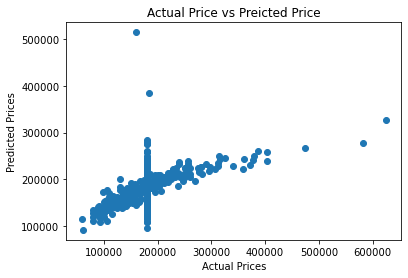

In [130]:
plt.scatter(ytest, lin_y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()




In [128]:
print('Metrics for Linear train:\n')
metrics_print(ytrain, lin_data_pred)
print('Metrics for Linear test:\n')
metrics_print(ytest, lin_y_pred)

Metrics for Linear train:

MAE: 29988.21638917923
MSE: 1671856417.245021
R2: 0.4204959902876745

Metrics for Linear test:

MAE: 30419.870942354453
MSE: 2077606176.1666472
R2: 0.32554150968105144

